In [ ]:
#Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn.model_selection import train_test_split #Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accurracy calculation

col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
#load dataset
pima = pd.read_csv("pima-indians-diabetes.csv",header = None, names = col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#After loading the data we understand the structure and variables, determine the target and feature variables
#split dataset in features and target variables
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
X = pima[feature_cols] #Features
y = pima.label #Target variable

In [ ]:
#Let's divide the data into taining and testing sets in the ratio of 70:30
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1) #70% training and 30% test

In [ ]:
#Create Decision Tree Classifier object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


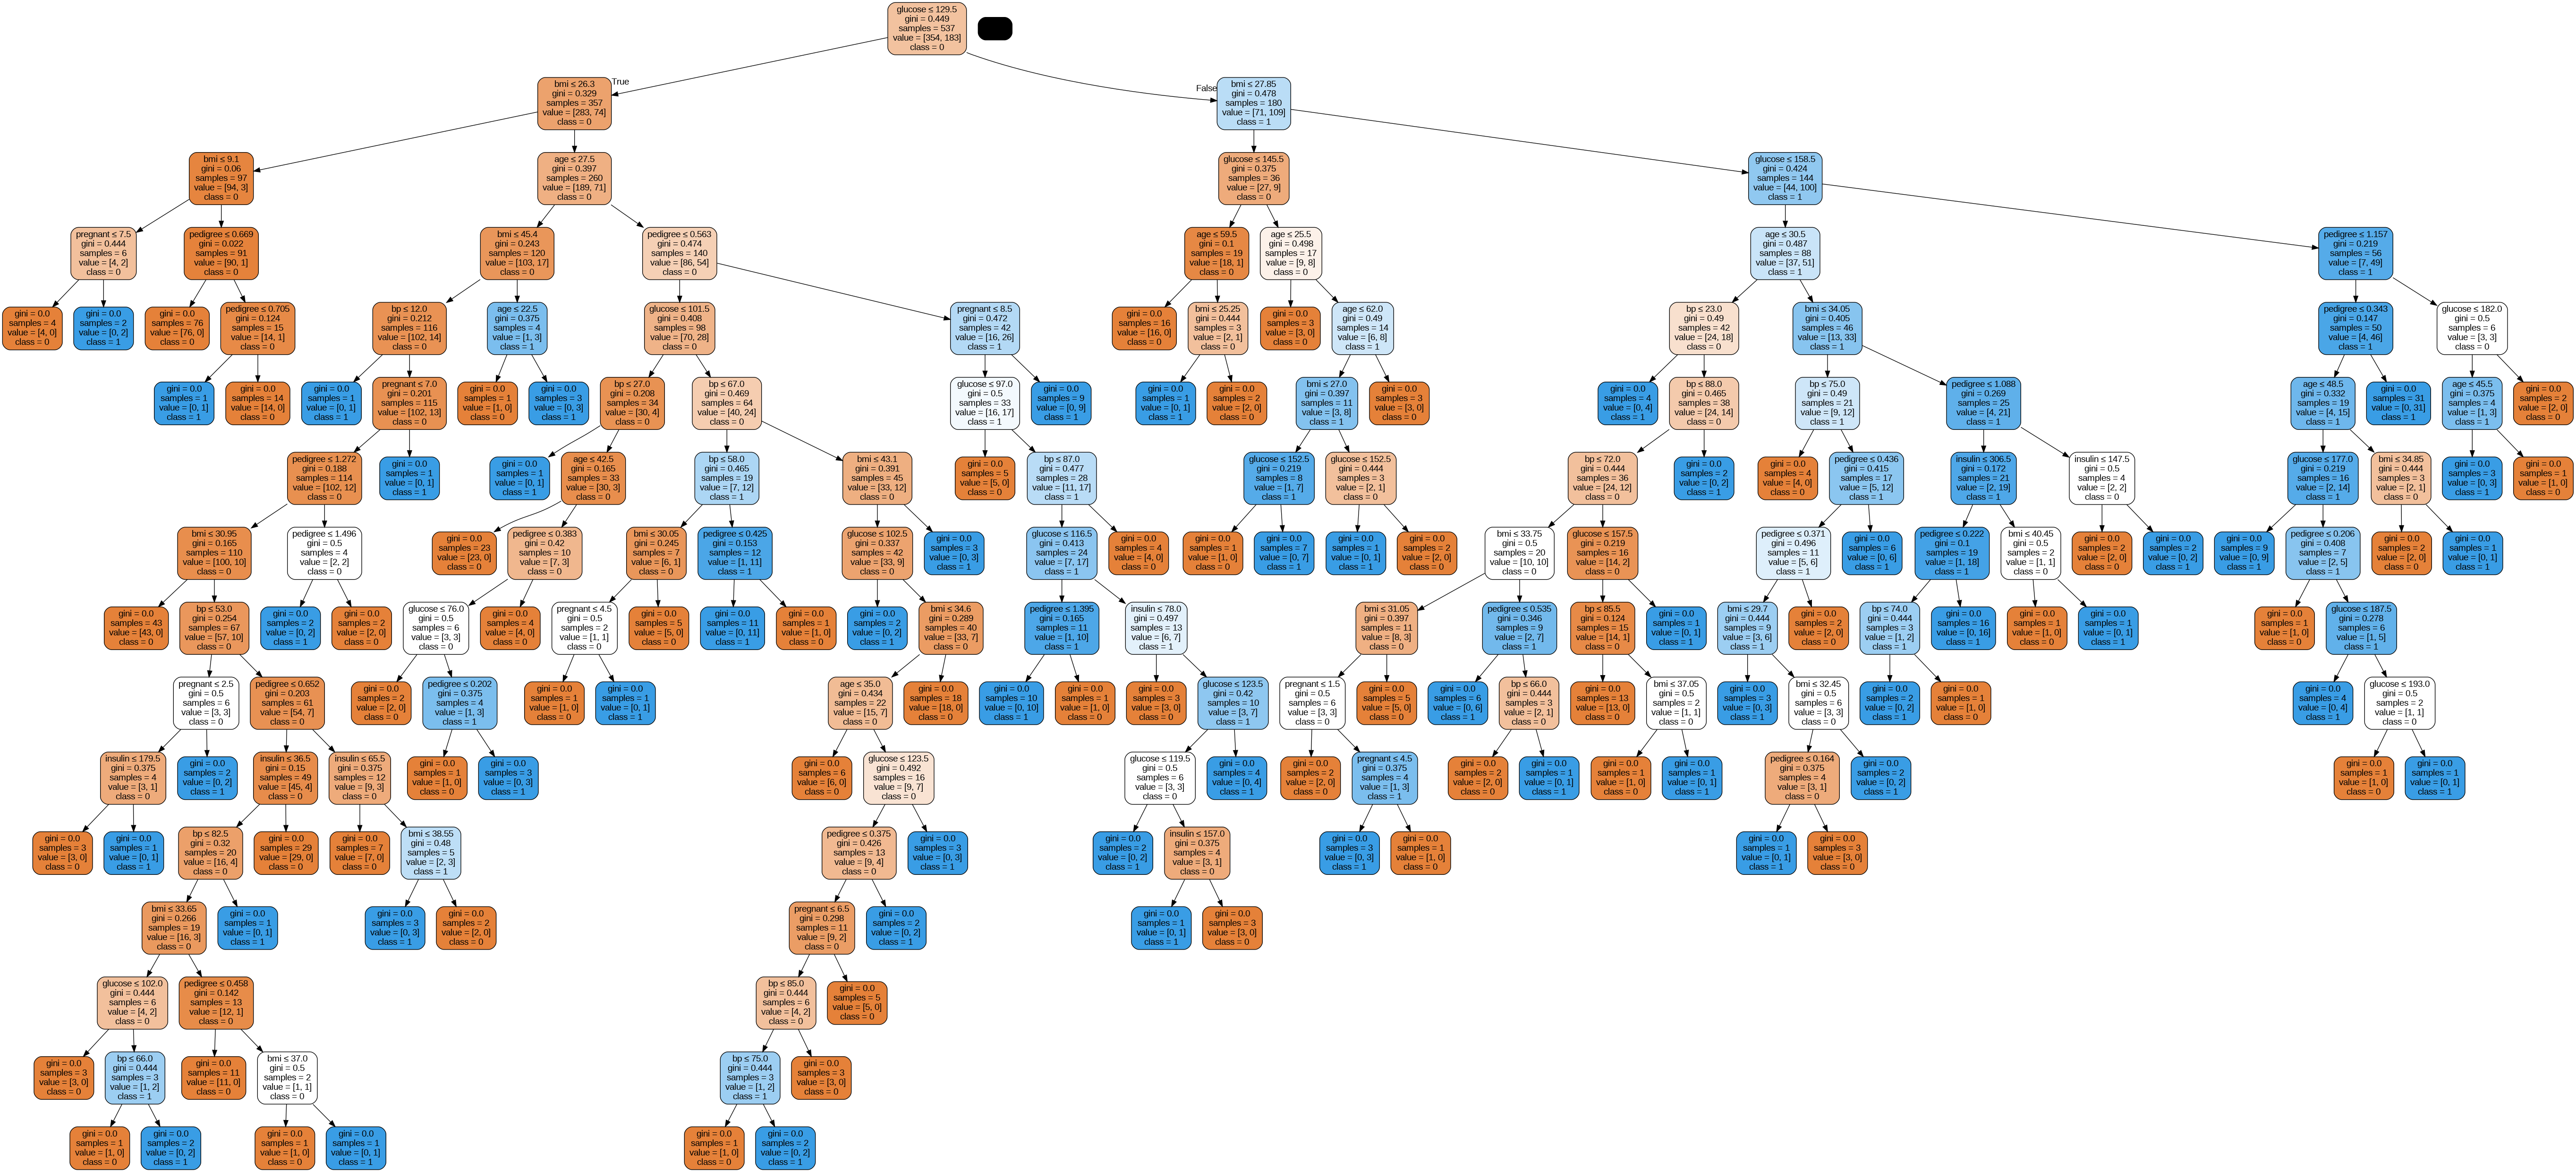

In [ ]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled=True, rounded = True,special_characters = True, feature_names = feature_cols, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.predict(X_test)
rfc.score(X_test, y_test)

0.8051948051948052

**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

adaboost_classifier = AdaBoostClassifier(clf, n_estimators = 50,random_state = 1)
adaboost_classifier.fit(X_train, y_train)
y_pred = adaboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.7012987012987013


**XGBoost Algorithm**

In [ ]:
import xgboost as xgb

#Create a DMAtrix for the training and testing data
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test,label = y_test)

#Define hyperparamteres for XGBoost
params = {
    'objective' : 'multi:softmax',  #For multiclass classification
    'num_class' : len(set(y_train)),
    'max_depth' : 3,
    'eta' : 0.3,
     'n_estimators':100,
    'eval_metric' : 'mlogloss'
}

#Train an XGBoost model
model = xgb.train(params, dtrain, num_boost_round = params['n_estimators'])

#Make predictions on the test data
y_pred = model.predict(dtest)

y_pred = y_pred.astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.7878787878787878


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:52:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
